In [45]:
#Importar librerias 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Para mostrar el arbol de decision
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

import numpy as np

In [46]:
# Cargar el dataset
data = pd.read_csv('cleaned_siniestros.csv')

In [47]:
X = data.drop(columns='isHeridoLeve')
y = data['isHeridoLeve']

# Dividir en train, test y validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [48]:
categorical_columns = ['Rol', 'Zona', 'Tipo de siniestro', 'Dia de la semana', 'Tipo de Vehiculo']

def preprocesar_variables_categoricas(data):
    '''Preprocesar variables categoricas'''
    dummies = pd.get_dummies(data[categorical_columns])
    # Eliminar columnas originales
    data.drop(columns=categorical_columns, inplace=True)
    # Concatenar dummies
    data = pd.concat([data, dummies], axis=1)
    return data

X_train = preprocesar_variables_categoricas(X_train)
X_val = preprocesar_variables_categoricas(X_val)
X_test = preprocesar_variables_categoricas(X_test)

In [49]:
# Get all columns in X_train, X_val and X_test
all_columns = set(X_train.columns).union(set(X_val.columns)).union(set(X_test.columns))

# Add missing columns to X_train, X_val and X_test
for column in all_columns:
    if column not in X_train.columns:
        X_train[column] = False
    if column not in X_val.columns:
        X_val[column] = False
    if column not in X_test.columns:
        X_test[column] = False

# Reorder columns
X_train = X_train[list(all_columns)]
X_val = X_val[list(all_columns)]
X_test = X_test[list(all_columns)]

features = list(X_train.columns)


In [50]:
# Normalizar datos
def normalizar_datos(data):
    '''Normalizar datos'''
    scaler = StandardScaler()
    data = scaler.fit_transform(data)
    return data

X_train = normalizar_datos(X_train)
X_val = normalizar_datos(X_val)
X_test = normalizar_datos(X_test)

In [51]:
# # Evaluar accuracy, precision, recall y F1
def obtener_metricas_evaluacion(y_real, y_predicho):
    '''Obtener metricas de evaluacion'''

    matrix_confusion = confusion_matrix(y_real, y_predicho)
    print('Accuracy:', accuracy_score(matrix_confusion))
    print('Precision:', precision_score(matrix_confusion))
    print('Recall:', recall_score(matrix_confusion))
    print('F1:', f1_score(matrix_confusion))
    
    sns.heatmap(matrix_confusion, annot=True, fmt='d')
    plt.xlabel('Predicho')
    plt.ylabel('Real')
    plt.show()

# def get_accuracy(matrix_confusion):
#     '''Obtener accuracy'''
#     sum = 0
#     for i in range(len(matrix_confusion)):
#         sum += matrix_confusion[i][i]
#     return sum / matrix_confusion.sum()

# def get_precision(matrix_confusion):
#     '''Obtener precision'''
#     columns = []
#     for i in range(len(matrix_confusion)):
#         if matrix_confusion[i,:].sum() == 0:
#             columns.append(0)
#         else:
#             columns.append(matrix_confusion[i][i] / matrix_confusion[i, :].sum())
#     return columns

# def get_recall(matrix_confusion):
#     '''Obtener recall'''
#     rows = []
#     for i in range(len(matrix_confusion)):
#         if matrix_confusion[:,i].sum() == 0:
#             rows.append(0)
#         else:
#             rows.append(matrix_confusion[i][i] / matrix_confusion[:, i].sum())
#     return rows

# def get_f1(matrix_confusion):
#     '''Obtener F1'''
#     precision = get_precision(matrix_confusion)
#     recall = get_recall(matrix_confusion)
#     f1 = []
#     for i in range(len(precision)):
#         if precision[i] + recall[i] == 0:
#             f1.append(0)
#         else:
#             f1.append(2 * (precision[i] * recall[i]) / (precision[i] + recall[i]))
#     return f1


In [52]:
# Crear un dataframe para almacenar los resultados
resultados = pd.DataFrame(columns=['Modelo', 'Accuracy', 'Precision', 'Recall', 'F1', 'Description'])

def agregar_resultados(modelo_nombre, y_real, y_predicho, descripcion=''):
    '''Agregar resultados al dataframe'''
    matrix_confusion = confusion_matrix(y_real, y_predicho)
    
    accuracy = accuracy_score(y_real, y_predicho)
    precision = precision_score(y_real, y_predicho)
    recall = recall_score(y_real, y_predicho)
    f1 = f1_score(y_real, y_predicho)
    
    resultados.loc[len(resultados)] = [modelo_nombre, accuracy, precision, recall, f1, descripcion]


## Random Forest

In [53]:
modelo_random_forest = RandomForestClassifier()
modelo_random_forest.fit(X_train, y_train)
y_pred = modelo_random_forest.predict(X_val)


agregar_resultados('Random Forest', y_val, y_pred, descripcion='n_estimators=100, max_depth=None')

modelo_random_forest = RandomForestClassifier(n_estimators=200)
modelo_random_forest.fit(X_train, y_train)
y_pred = modelo_random_forest.predict(X_val)

agregar_resultados('Random Forest', y_val, y_pred, 'n_estimators=200, max_depth=None')

modelo_random_forest = RandomForestClassifier(n_estimators=200, max_depth=10)
modelo_random_forest.fit(X_train, y_train)
y_pred = modelo_random_forest.predict(X_val)

agregar_resultados('Random Forest', y_val, y_pred, 'n_estimators=100, max_depth=10')


## Regresion Logistica

In [54]:
# Entrenar modelo Regresion Logistica
modelo_regresion_logistica = LogisticRegression()
modelo_regresion_logistica.fit(X_train, y_train)
y_pred = modelo_regresion_logistica.predict(X_val)

agregar_resultados('Regresion Logistica', y_val, y_pred, 'max_iter=100, C=1')

# Entrenar modelo Regresion Logistica
modelo_regresion_logistica = LogisticRegression(max_iter=200)
modelo_regresion_logistica.fit(X_train, y_train)
y_pred = modelo_regresion_logistica.predict(X_val)

agregar_resultados('Regresion Logistica', y_val, y_pred, 'max_iter=200, C=1')

# Entrenar modelo Regresion Logistica
modelo_regresion_logistica = LogisticRegression(max_iter=200, C=0.1)
modelo_regresion_logistica.fit(X_train, y_train)
y_pred = modelo_regresion_logistica.predict(X_val)

agregar_resultados('Regresion Logistica', y_val, y_pred, 'max_iter=200, C=0.1')


## SVM

In [55]:
modelo_svm = SVC()
modelo_svm.fit(X_train, y_train)
y_pred = modelo_svm.predict(X_val)

agregar_resultados('SVM', y_val, y_pred, 'C=1, kernel=rbf')

modelo_svm = SVC(C=0.1)
modelo_svm.fit(X_train, y_train)
y_pred = modelo_svm.predict(X_val)

agregar_resultados('SVM', y_val, y_pred, 'C=0.1, kernel=rbf')

modelo_svm = SVC(C=0.1, kernel='linear')
modelo_svm.fit(X_train, y_train)
y_pred = modelo_svm.predict(X_val)

agregar_resultados('SVM', y_val, y_pred, 'C=0.1, kernel=linear')




## Decision tree

In [56]:
modelo_decision_tree = DecisionTreeClassifier()
modelo_decision_tree.fit(X_train, y_train)
y_pred = modelo_decision_tree.predict(X_val)

agregar_resultados('Decision Tree', y_val, y_pred, 'max_depth=None, min_samples_split=2')

modelo_decision_tree = DecisionTreeClassifier(max_depth=10)
modelo_decision_tree.fit(X_train, y_train)
y_pred = modelo_decision_tree.predict(X_val)

agregar_resultados('Decision Tree', y_val, y_pred, 'max_depth=10, min_samples_split=2')

modelo_decision_tree = DecisionTreeClassifier(max_depth=10, min_samples_split=5)
modelo_decision_tree.fit(X_train, y_train)
y_pred = modelo_decision_tree.predict(X_val)

agregar_resultados('Decision Tree', y_val, y_pred, 'max_depth=10, min_samples_split=5')

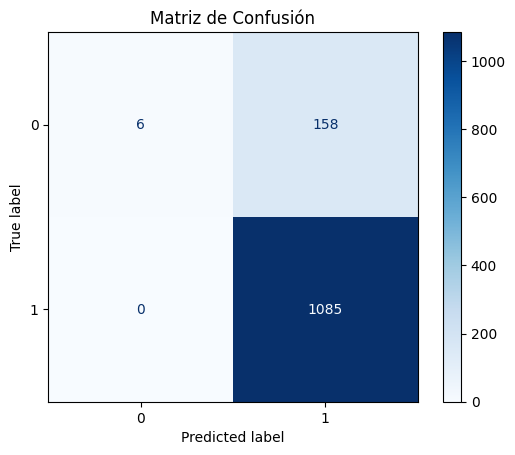

In [64]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Genera la matriz de confusión
matrix_confusion = confusion_matrix(y_val, y_pred, labels=[0, 1])

# Crea la visualización de la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=matrix_confusion)
disp.plot(cmap="Blues")  # Puedes cambiar el color con cmap

# Muestra la gráfica
plt.title("Matriz de Confusión")
plt.show()
